In [220]:
import networkx as nx
import geopandas as gpd
import os.path as osp
from matplotlib import cm

In [353]:
base_dir = "/home/fiona/birdMigration/data/preprocessed/radar/fall/2016"
#base_dir = "/home/fiona/birdMigration/data/raw/radar/fall/2015"
G = nx.read_gpickle(osp.join(base_dir, "delaunay.gpickle"))

In [354]:
df = gpd.read_file(osp.join(base_dir, 'voronoi.shp'))

In [387]:
df['max_range_km'] = 180
df.loc[df.radar.isin(['nldbl', 'nlhrw', 'nldhl']), 'max_range_km'] = 320
df.loc[df.radar.isin(['bezav', 'bejab', 'bewid']), 'max_range_km'] = 240
extent = [-0.4, 46.36, 16.07, 55.80]

Text(0.5, 1.0, 'bird densities at time t')

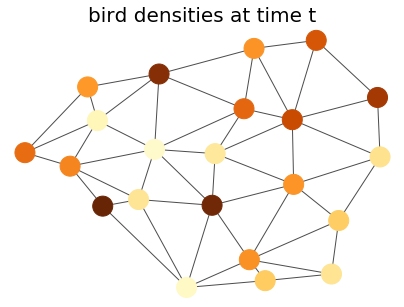

In [355]:
pos = {ridx:(df[df.radar == name].x.values[0], df[df.radar == name].y.values[0]) for (ridx, name) in nx.get_node_attributes(G, 'radar').items()}
cmap = cm.get_cmap('YlOrBr')
ncolors = [cmap(np.random.rand()) for n in G.nodes()]
fig, ax = plt.subplots(figsize=(7,5))
nx.draw(nx.Graph(G), pos=pos, with_labels=False, node_size=400, node_color=ncolors, edge_color='#4d4d4d', ax=ax)
ax.set_title('bird densities at time t', fontsize=20)
#fig.savefig('/home/fiona/birdMigration/data/plots/presentations/G_birds_t.png', bbox_inches='tight', dpi=300, transparent=True)

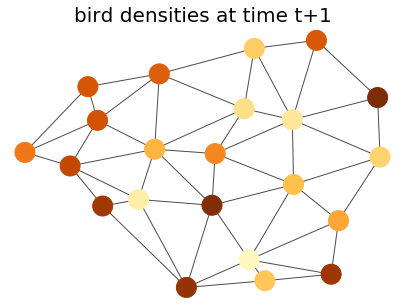

In [289]:
ncolors = [cmap(np.random.rand()) for n in G.nodes()]
fig, ax = plt.subplots(figsize=(7,5))
nx.draw(nx.Graph(G), pos=pos, with_labels=False, node_size=400, node_color=ncolors, edge_color='#4d4d4d', ax=ax)
ax.set_title('bird densities at time t+1', fontsize=20);
fig.savefig('/home/fiona/birdMigration/data/plots/presentations/G_birds_t1.png', bbox_inches='tight', dpi=300, transparent=True)

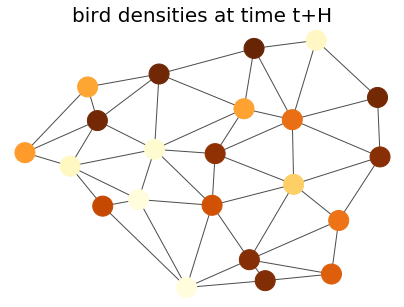

In [405]:
ncolors = [cmap(np.random.rand()) for n in G.nodes()]
fig, ax = plt.subplots(figsize=(7,5))
nx.draw(nx.Graph(G), pos=pos, with_labels=False, node_size=400, node_color=ncolors, edge_color='#4d4d4d', ax=ax)
ax.set_title('bird densities at time t+H', fontsize=20);
fig.savefig('/home/fiona/birdMigration/data/plots/presentations/G_birds_T.png', bbox_inches='tight', dpi=300, transparent=True)

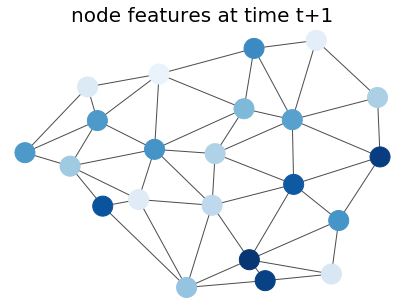

In [407]:
cmap = cm.get_cmap('Blues')
ncolors = [cmap(np.random.rand()) for n in G.nodes()]
fig, ax = plt.subplots(figsize=(7,5))
nx.draw(nx.Graph(G), pos=pos, with_labels=False, node_size=400, node_color=ncolors, edge_color='#4d4d4d', ax=ax)
ax.set_title('node features at time t+1', fontsize=20);
fig.savefig('/home/fiona/birdMigration/data/plots/presentations/G_node_features_t+1.png', bbox_inches='tight', dpi=300, transparent=True)

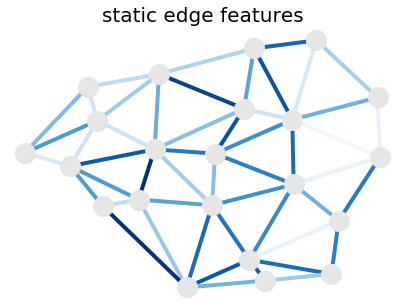

In [406]:
cmap = cm.get_cmap('Blues')
ecolors = [cmap(np.random.rand()) for e in G.edges()]
fig, ax = plt.subplots(figsize=(7,5))
nx.draw(nx.Graph(G), pos=pos, with_labels=False, node_size=400, node_color='#e6e6e6', edge_color=ecolors, width=4, ax=ax)
ax.set_title('static edge features', fontsize=20);
fig.savefig('/home/fiona/birdMigration/data/plots/presentations/G_edge_features.png', bbox_inches='tight', dpi=300, transparent=True)

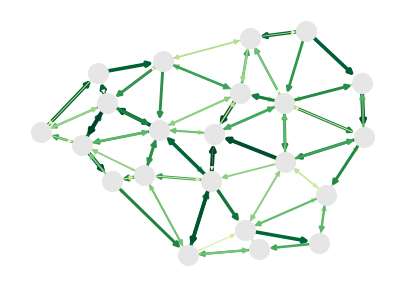

In [292]:
cmap = cm.get_cmap('YlGn')
widths = [np.random.rand()*4 for e in G.edges()]
ecolors = [cmap(w/4) for w in widths]
fig, ax = plt.subplots(figsize=(7,5))
nx.draw(G, pos=pos, with_labels=False, node_size=400, node_color='#e6e6e6', edge_color=ecolors, width=widths, ax=ax);
fig.savefig('/home/fiona/birdMigration/data/plots/presentations/G_messages.png', bbox_inches='tight', dpi=300, transparent=True)

In [399]:
pts = gpd.GeoDataFrame(dict(geometry=[geometry.Point((row.x, row.y)) for ridx, row in df.iterrows()], 
                            birds=[cmap(np.random.rand()) for n in G.nodes()], 
                            rrange=df.max_range_km), crs=df.crs)

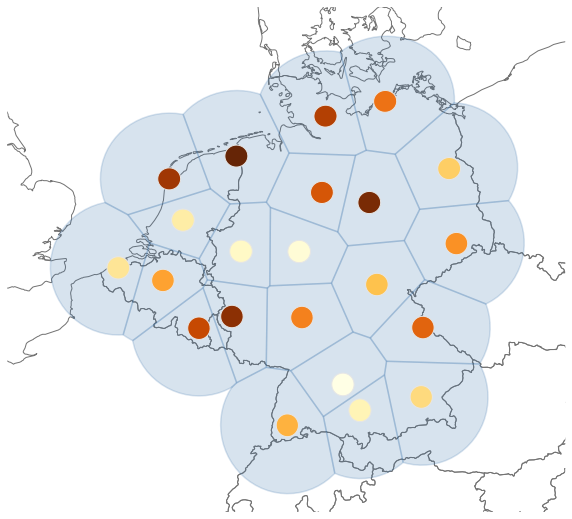

In [403]:
d = '/home/fiona/birdMigration/data/shapes'
countries = gpd.read_file(osp.join(d, 'ne_10m_admin_0_countries_lakes.shp'))
cmap = cm.get_cmap('YlOrBr')
fig, ax = plt.subplots(figsize=(10,10), subplot_kw = {'projection' : gcrs.AlbersEqualArea()})
gplt.polyplot(countries, ax=ax, edgecolor="#737373", extent=extent, zorder=1)
gplt.polyplot(df.to_crs(epsg='4326'), edgecolor='#3973ac', facecolor='#3973ac', alpha=0.2, extent=extent, ax=ax, linewidth=1.5, zorder=2)
gplt.choropleth(pts.buffer(25_000).to_crs(epsg='4326'), hue=pts.birds, ax=ax, extent=extent, cmap=cmap, edgecolor='#e6e6e6', linewidth=1, zorder=3)
fig.savefig('/home/fiona/birdMigration/data/plots/presentations/voronoi.png', bbox_inches='tight', dpi=300, transparent=True)

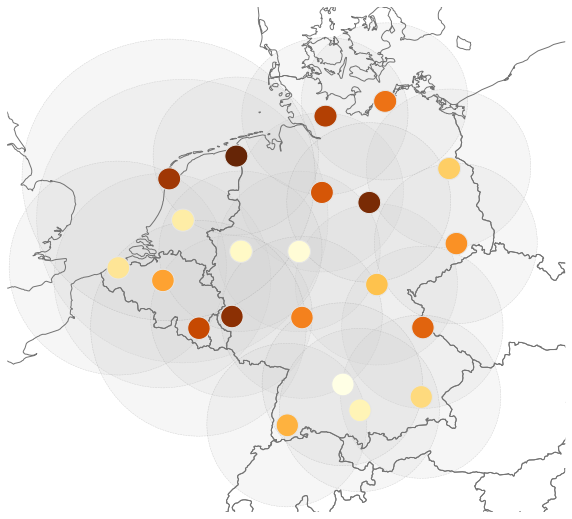

In [402]:
d = '/home/fiona/birdMigration/data/shapes'
countries = gpd.read_file(osp.join(d, 'ne_10m_admin_0_countries_lakes.shp'))
cmap = cm.get_cmap('YlOrBr')
fig, ax = plt.subplots(figsize=(10,10), subplot_kw = {'projection' : gcrs.AlbersEqualArea()})
gplt.polyplot(countries, ax=ax, edgecolor="#737373", linewidth=1, extent=extent, zorder=1)
gplt.choropleth(pts.buffer(25_000).to_crs(epsg='4326'), hue=pts.birds, ax=ax, extent=extent, cmap=cmap, edgecolor='#e6e6e6', linewidth=1)
gplt.polyplot(pts.buffer(pts.rrange * 1000).to_crs(epsg='4326'), ax=ax, extent=extent, edgecolor='#404040', linewidth=0.5, linestyle='--', facecolor='lightgray', alpha=0.2)
fig.savefig('/home/fiona/birdMigration/data/plots/presentations/radar_stations_with_range.png', bbox_inches='tight', dpi=300, transparent=True)

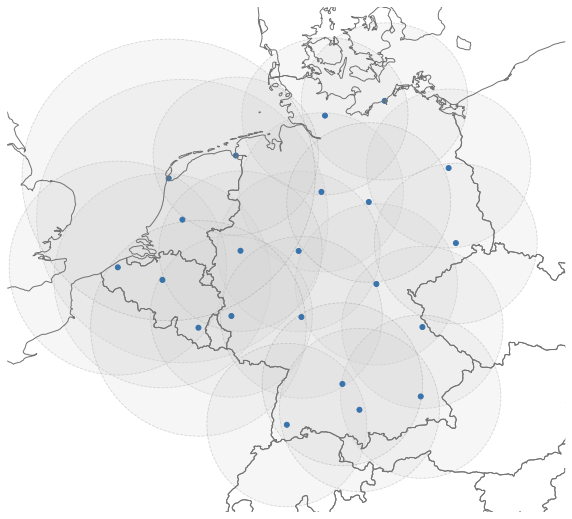

In [416]:
d = '/home/fiona/birdMigration/data/shapes'
countries = gpd.read_file(osp.join(d, 'ne_10m_admin_0_countries_lakes.shp'))
cmap = cm.get_cmap('YlOrBr')
fig, ax = plt.subplots(figsize=(10,10), subplot_kw = {'projection' : gcrs.AlbersEqualArea()})
gplt.polyplot(countries, ax=ax, edgecolor="#737373", linewidth=1, extent=extent, zorder=1)
#gplt.polyplot(pts.buffer(25_000).to_crs(epsg='4326'), ax=ax, extent=extent, edgecolor='#e6e6e6', linewidth=1)
gplt.pointplot(pts.to_crs(epsg='4326'), ax=ax, extent=extent, color='#3973ac')
gplt.polyplot(pts.buffer(pts.rrange * 1000).to_crs(epsg='4326'), ax=ax, extent=extent, edgecolor='#404040', linewidth=0.8, linestyle='--', facecolor='lightgray', alpha=0.2)
fig.savefig('/home/fiona/birdMigration/data/plots/presentations/radar_stations_with_max_range.png', bbox_inches='tight', dpi=300, transparent=True)

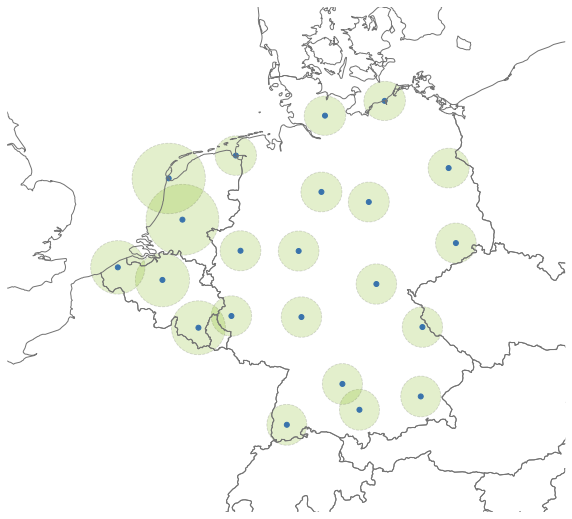

In [415]:
d = '/home/fiona/birdMigration/data/shapes'
countries = gpd.read_file(osp.join(d, 'ne_10m_admin_0_countries_lakes.shp'))
cmap = cm.get_cmap('YlOrBr')
fig, ax = plt.subplots(figsize=(10,10), subplot_kw = {'projection' : gcrs.AlbersEqualArea()})
gplt.polyplot(countries, ax=ax, edgecolor="#737373", linewidth=1, extent=extent, zorder=1)
#gplt.polyplot(pts.buffer(25_000).to_crs(epsg='4326'), ax=ax, extent=extent, edgecolor='#e6e6e6', linewidth=1)
gplt.pointplot(pts.to_crs(epsg='4326'), ax=ax, extent=extent, color='#3973ac')
gplt.polyplot(pts.buffer(pts.rrange * 1000 / 4).to_crs(epsg='4326'), ax=ax, extent=extent, edgecolor='#404040', linewidth=0.8, linestyle='--', facecolor='#77b300', alpha=0.2)
fig.savefig('/home/fiona/birdMigration/data/plots/presentations/radar_stations_with_max_bird_range.png', bbox_inches='tight', dpi=300, transparent=True)

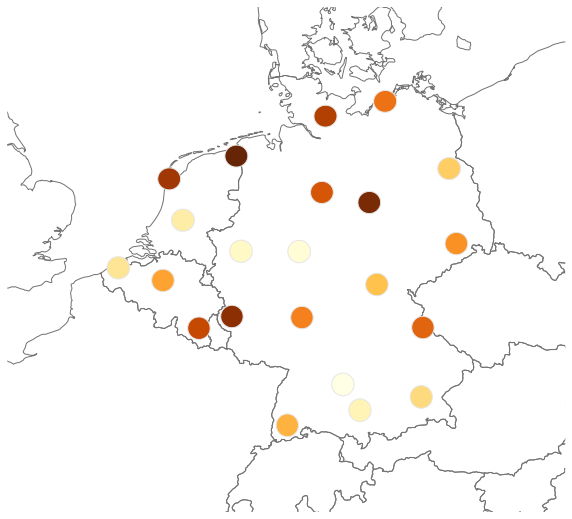

In [420]:
d = '/home/fiona/birdMigration/data/shapes'
countries = gpd.read_file(osp.join(d, 'ne_10m_admin_0_countries_lakes.shp'))
cmap = cm.get_cmap('YlOrBr')
fig, ax = plt.subplots(figsize=(10,10), subplot_kw = {'projection' : gcrs.AlbersEqualArea()})
gplt.polyplot(countries, ax=ax, edgecolor="#737373", linewidth=1, extent=extent, zorder=1)
gplt.choropleth(pts.buffer(25_000).to_crs(epsg='4326'), hue=pts.birds, ax=ax, extent=extent, cmap=cmap, edgecolor='#e6e6e6', linewidth=1, alpha=1, zorder=2)
#gplt.pointplot(pts.to_crs(epsg='4326'), ax=ax, extent=extent, color='#3973ac', zorder=3)
#gplt.polyplot(pts.buffer(pts.rrange * 1000 / 4).to_crs(epsg='4326'), ax=ax, extent=extent, edgecolor='#404040', linewidth=0.8, linestyle='--', facecolor='#77b300', alpha=0.2)
fig.savefig('/home/fiona/birdMigration/data/plots/presentations/radar_stations_vp_range.png', bbox_inches='tight', dpi=300, transparent=True)

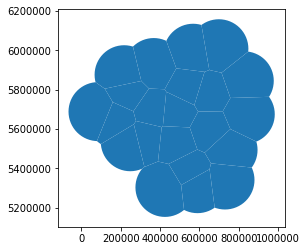

In [211]:
df.plot()

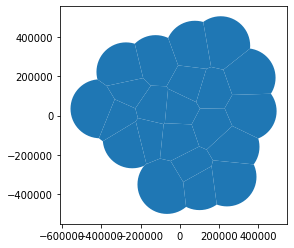

In [346]:
df.plot()

In [337]:
pts = gpd.GeoSeries([geometry.Point((row.lon, row.lat)) for ridx, row in df.iterrows()], crs=f'EPSG:4326')

In [340]:
pts.y.mean()

51.02314472196822